In [102]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import copy

from sklearn.preprocessing import StandardScaler

import tensorflow as tf 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report


In [11]:
text = input("enter text")
arr = text.split()

cols = [arr[i] for i in range(len(arr)-1)  if arr[i+1]=="="]
print(cols)


enter     obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS     alpha = Right Ascension angle (at J2000 epoch)     delta = Declination angle (at J2000 epoch)     u = Ultraviolet filter in the photometric system     g = Green filter in the photometric system     r = Red filter in the photometric system     i = Near Infrared filter in the photometric system     z = Infrared filter in the photometric system     run_ID = Run Number used to identify the specific scan     rereun_ID = Rerun Number to specify how the image was processed     cam_col = Camera column to identify the scanline within the run     field_ID = Field number to identify each field     spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)     class = object class (galaxy, star or quasar object)     redshift = redshift value based on the increase in wavelength 

['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rereun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']


['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rereun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

In [127]:
df = pd.read_csv("star_classification_SDSS17.csv")

In [50]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


Trying to analyse the dype of data and algorothim and variables to use

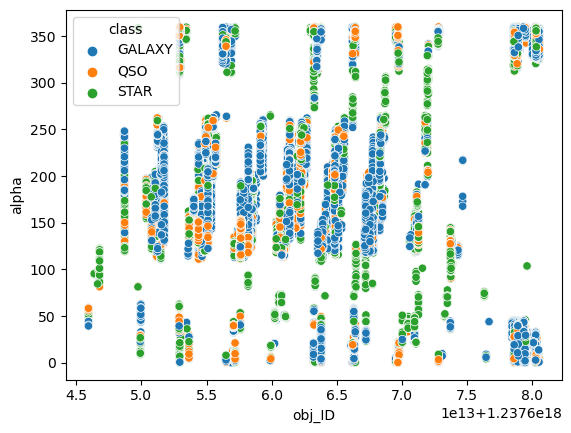

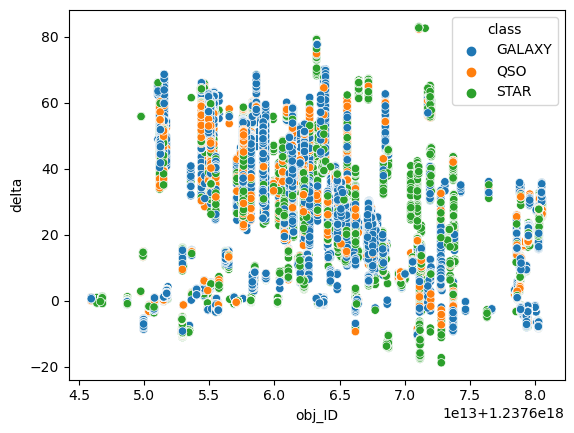

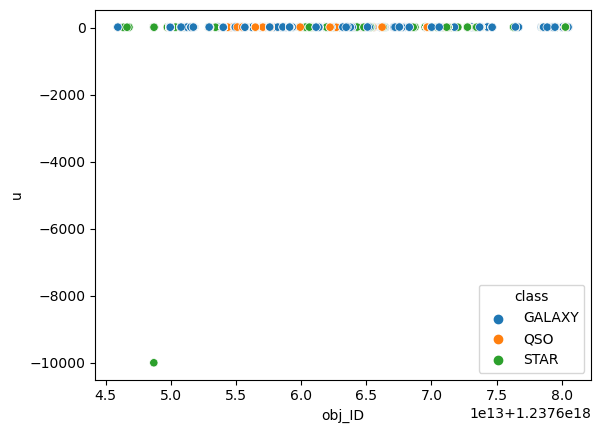

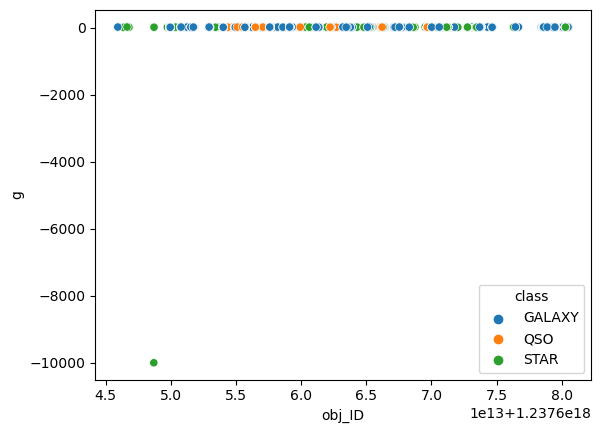

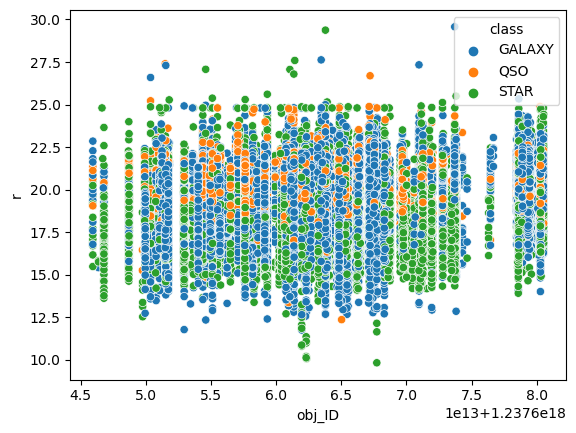

KeyboardInterrupt: 

In [16]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label,y=y_label,data=df,hue="class")
        plt.show()

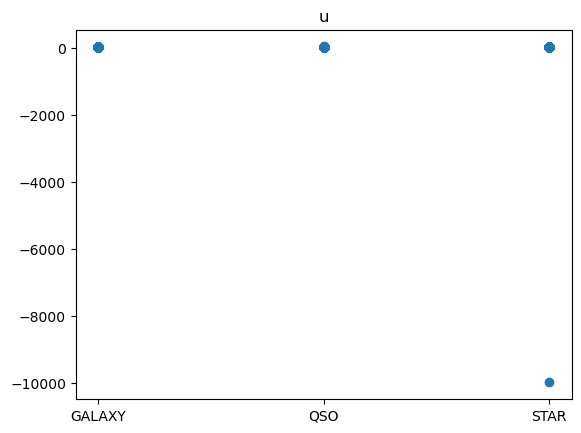

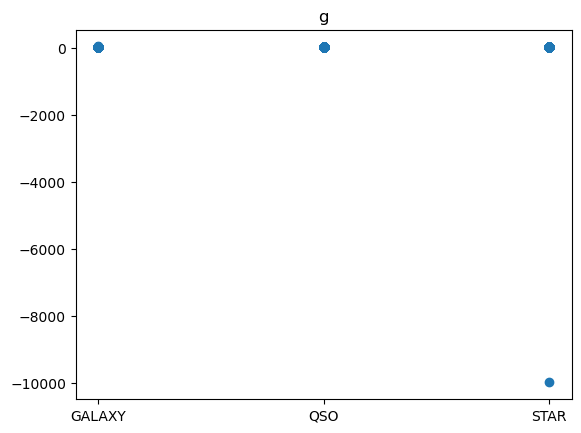

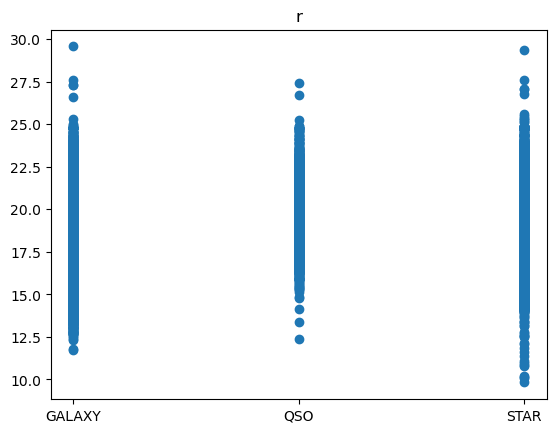

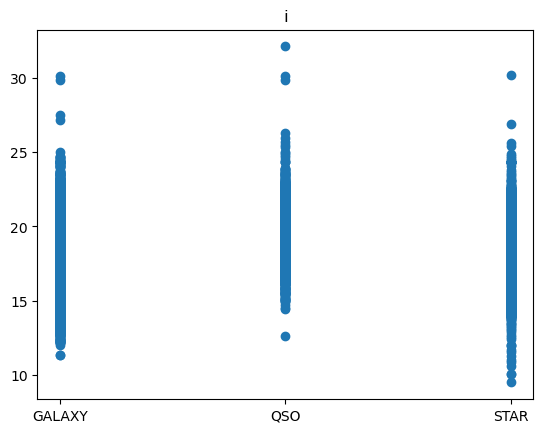

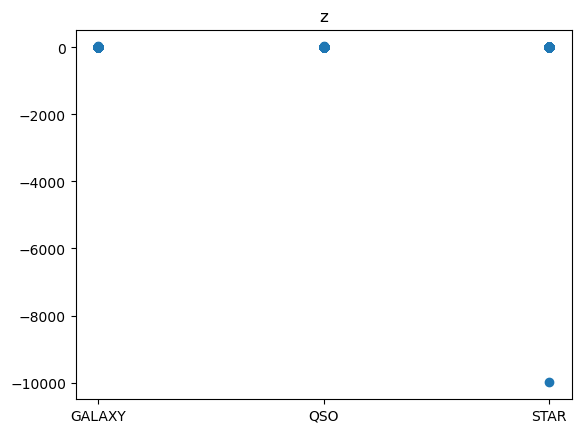

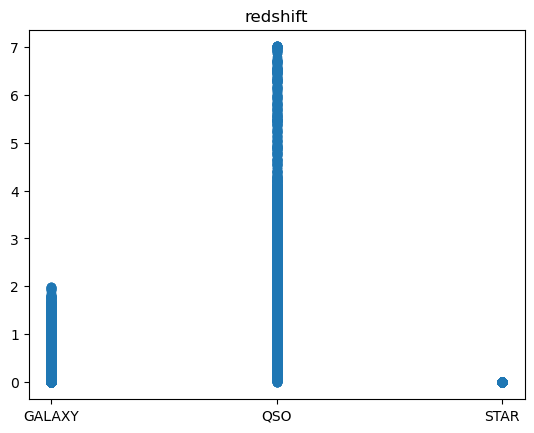

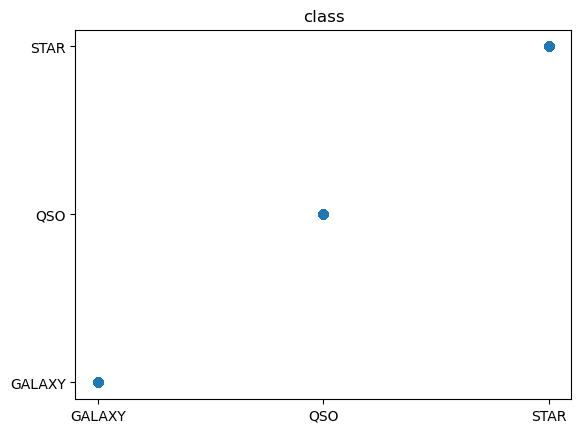

In [27]:
for label in dfi.columns[:]:
    plt.scatter(dfi["class"],dfi[label])
    plt.title(label)
    #plt.ylabel(label)
   # plt.ylabel(df["class"])
    plt.show()

In [51]:
intrest_cols = ["u","g","r","i","z","redshift","class"]
dfi = df[intrest_cols]
print(dfi)

              u         g         r         i         z  redshift   class
0      23.87882  22.27530  20.39501  19.16573  18.79371  0.634794  GALAXY
1      24.77759  22.83188  22.58444  21.16812  21.61427  0.779136  GALAXY
2      25.26307  22.66389  20.60976  19.34857  18.94827  0.644195  GALAXY
3      22.13682  23.77656  21.61162  20.50454  19.25010  0.932346  GALAXY
4      19.43718  17.58028  16.49747  15.97711  15.54461  0.116123  GALAXY
...         ...       ...       ...       ...       ...       ...     ...
99995  22.16759  22.97586  21.90404  21.30548  20.73569  0.000000  GALAXY
99996  22.69118  22.38628  20.45003  19.75759  19.41526  0.404895  GALAXY
99997  21.16916  19.26997  18.20428  17.69034  17.35221  0.143366  GALAXY
99998  25.35039  21.63757  19.91386  19.07254  18.62482  0.455040  GALAXY
99999  22.62171  21.79745  20.60115  20.00959  19.28075  0.542944  GALAXY

[100000 rows x 7 columns]


array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'rerun_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'spec_obj_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

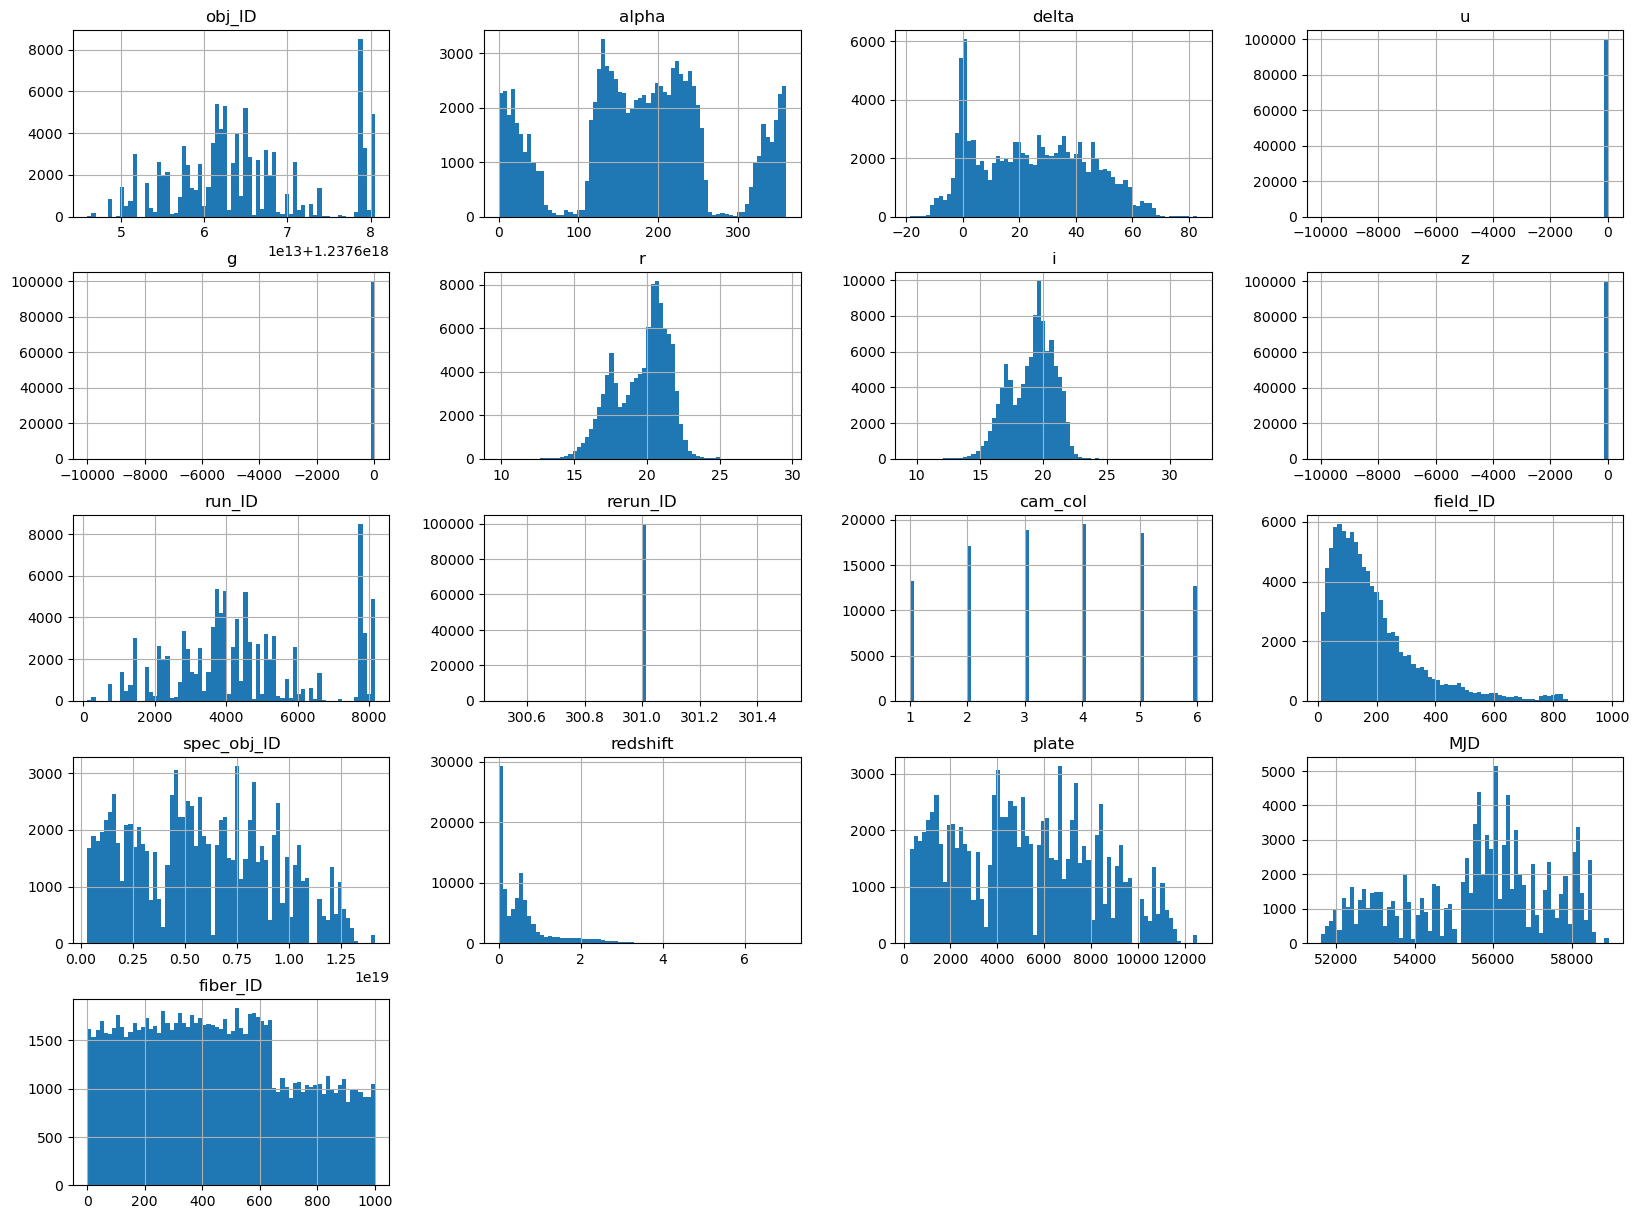

In [26]:
df.hist(bins=70,figsize=(20,15))

In [122]:
def plot_violin(x, y):
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x=x, y=y)
    plt.show()
    return


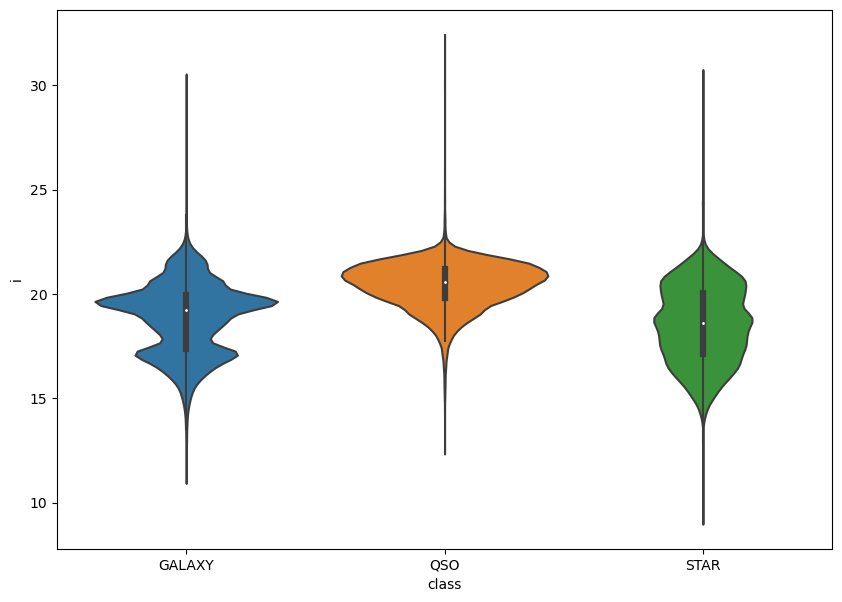

In [134]:
plot_violin(x=df["class"], y=df["i"])

In [135]:
intrest_cols = ["u","g","r","i","z","redshift","class"]
dfi = df[intrest_cols]
df = dfi #updating only intrested ones and putting class at last
df["class"] =[0 if i=="GALAXY" else 1 if i=="QSO" else 2 for i in df["class"]]

/tmp/ipykernel_24772/1215432977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"] =[0 if i=="GALAXY" else 1 if i=="QSO" else 2 for i in df["class"]]


In [70]:
train, val, test = np.split( df.sample(frac=1), [ int(0.6*len(df)) , int(0.8*len(df)) ])

/home/ashwin/.conda/envs/ml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
def get_xy(df, y_label,x_label=None):
    df = copy.deepcopy(df)
    if x_label is None:
        X = df[ [c for c in df.columns if c!=y_label]].values
    else:
        if len(x_label)==1:
            X=df[x_label[0]].values.reshape(-1,1)
        else:
            X = df[x_label].values
    y = df[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data,X,y

In [72]:
_, x_train_all, y_train_all = get_xy(train,"class",x_label=df.columns[:-1])
_, x_val_all, y_val_all = get_xy(val,"class",x_label=df.columns[:-1])
_, x_test_all, y_test_all = get_xy(test,"class",x_label=df.columns[:-1])

In [73]:
reg = LinearRegression()
reg.fit(x_train_all,y_train_all)

LinearRegression()

In [76]:
reg.score(x_test_all,y_test_all)

0.23443782922677536

In [112]:
type_normalizer = tf.keras.layers.Normalization(input_shape=(6,) , axis=None)
type_normalizer.adapt(x_train_all.reshape(-1,))

nn_model = tf.keras.Sequential(
    
    [type_normalizer,
     tf.keras.layers.Dense(32, activation = "relu"),
     tf.keras.layers.Dense(32, activation = "relu"),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(1)
    ])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error' )

In [81]:
from tqdm.keras import TqdmCallback


In [117]:
history = nn_model.fit(
    x_train_all, y_train_all,
    validation_data=(x_val_all, y_val_all),
    verbose=0, callbacks=[TqdmCallback(verbose=1)],epochs=50
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [84]:
def plot_loss(hist):
    plt.plot(hist.history["loss"] ,label = "loss", color = "blue")
    plt.plot(hist.history["val_loss"] ,label = "val_loss", color = "red")

    plt.legend()
    plt.title("class vs var")
    plt.ylabel("MSE")
    plt.xlabel("Epoch")
    plt.grid(True)
    plt.show()

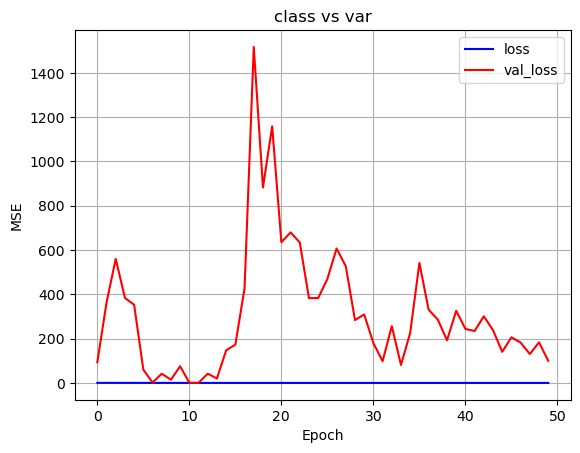

In [118]:
plot_loss(history)

In [91]:
history.

KeyError: 'accuracy'

In [119]:
y_predict = nn_model.predict(x_test_all)
print(y_predict)

625/625 [==============================] - 0s 760us/step
[[ 0.05311394]
 [-0.01225525]
 [ 0.00977945]
 ...
 [-0.01221985]
 [-0.02355188]
 [-0.00870913]]


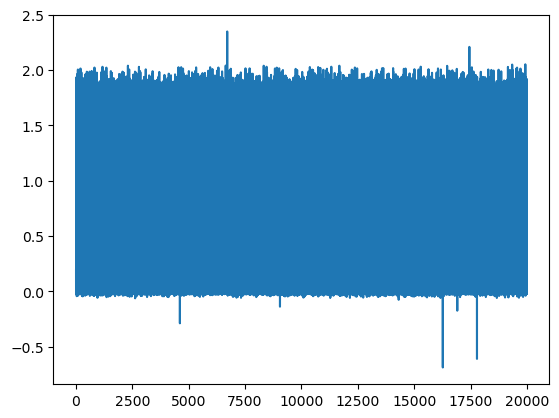

In [99]:
plt.plot(np.array(y_predict))

In [120]:
y_predict =[0 if i<0.5 else 1 if i<1.5 else 2 for i in y_predict]

In [104]:
print(classification_report(y_test_all,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     11960
           1       0.76      0.92      0.83      3768
           2       0.96      0.81      0.88      4272

    accuracy                           0.91     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.92      0.91      0.92     20000



In [121]:
print(classification_report(y_test_all,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11960
           1       0.83      0.92      0.87      3768
           2       0.95      0.94      0.95      4272

    accuracy                           0.94     20000
   macro avg       0.92      0.94      0.93     20000
weighted avg       0.94      0.94      0.94     20000

